| epoch 1 |  iter 1 / 351 | time 1[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 14[s] | loss 3.09
| epoch 1 |  iter 41 / 351 | time 29[s] | loss 1.90
| epoch 1 |  iter 61 / 351 | time 42[s] | loss 1.72
| epoch 1 |  iter 81 / 351 | time 57[s] | loss 1.46
| epoch 1 |  iter 101 / 351 | time 82[s] | loss 1.19
| epoch 1 |  iter 121 / 351 | time 101[s] | loss 1.14
| epoch 1 |  iter 141 / 351 | time 124[s] | loss 1.09
| epoch 1 |  iter 161 / 351 | time 142[s] | loss 1.06
| epoch 1 |  iter 181 / 351 | time 157[s] | loss 1.04
| epoch 1 |  iter 201 / 351 | time 179[s] | loss 1.03
| epoch 1 |  iter 221 / 351 | time 197[s] | loss 1.02
| epoch 1 |  iter 241 / 351 | time 221[s] | loss 1.02
| epoch 1 |  iter 261 / 351 | time 233[s] | loss 1.01
| epoch 1 |  iter 281 / 351 | time 246[s] | loss 1.00
| epoch 1 |  iter 301 / 351 | time 259[s] | loss 1.00
| epoch 1 |  iter 321 / 351 | time 272[s] | loss 1.00
| epoch 1 |  iter 341 / 351 | time 286[s] | loss 1.00
Q 10/15/94                     
T 1994-10

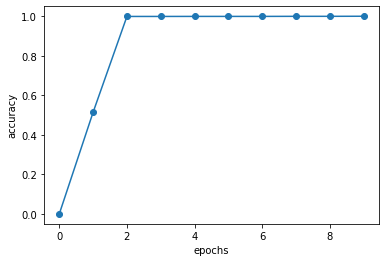

In [6]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# データの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 入力文を反転
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.show()
